In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def standardize(x):
    '''
        標準化を行う
        ------------
        x : 標準化前のx1、x2
    '''
    x_mean = x.mean(axis=0)       # 列ごとの平均値を求める
    std = x.std(axis=0)           # 列ごとの標準偏差を求める  
    return (x - x_mean) / std     # 標準化した値を返す

def create_matrix(x1_2):
    '''
        バイアス項x0、x1、x2、x1の2乗の行列を作成                
    '''
    x0 = np.ones([x.shape[0], 1])  # バイアスに対応する1の項
    x3 = x1_2[:,0,np.newaxis] ** 2 # x1を2乗したベクトルを作成
    return np.hstack(
        [x0, x1_2, x3])            # x0, x1_2, x3を列方向に連結

def sigmoid(x, parameter):
    '''
        シグモイド関数
        ------------
        X         : x0、x1、x2の行列
        parameter : w0,w1,w3のベクトル
    '''
    return 1 / (1 + np.exp(-np.dot(x, parameter)))

def logistic_polynomial(X, t):
    '''
        多項式を用いたロジスティック回帰で学習する
        ------------
        X : x0,x1,x2、x1を2乗した項のの行列
        t : 分類値(正解ラベル)
    '''
    parameter = np.random.rand(4) # w0,w1,w2,w3を初期化
    LNR = 1e-3                    # 学習率を0.001に設定
    loop = 1000                   # 更新回数
    count = 1                     # 更新回数をカウントする変数を0で初期化
    for i in range(loop):         # 学習をloop回繰り返す
        # 確率的勾配降下法でパラメーターを更新
        p = np.random.permutation(X.shape[0])
        for tmp_x, tmp_t in zip(X[p,:], t[p]):
            # w0,w1,w3,w33を更新する
            parameter = parameter - LNR * np.dot(
                sigmoid(X, parameter) - t,
                X
                )
        # 最初の1回と以降100回ごとにログを出力
        if (count == 1 or count % 100 == 0):
            print('{}回: parameter = {}'.format(count, parameter))        
        count += 1               # カウンター変数の値を1増やす
   
    return parameter             # 学習後のw0、w1、w2を返す

In [2]:
# 学習データを読み込む
data = np.loadtxt(
    'inseparable.csv',   # 読み込むファイル
    dtype='int',         # データ型を指定
    delimiter=',',       # 区切り文字を指定
    skiprows=1           # 1行目のタイトルを読み飛ばす
    )
x = data[:,0:2]          # x1、x2を行列xに代入
t = data[:,2]            # 3列目の成分をtに代入
x_std = standardize(x)   # xのすべての成分を標準化
X = create_matrix(x_std) # 標準化したxにバイアス項を追加する
# パラメーターの値を求める
parameter = logistic_polynomial(X, t)

1回: parameter = [ 0.1010931   0.10227331 -0.06026082  0.29234585]
100回: parameter = [-1.66320967  1.0333136  -2.82354075  1.8114383 ]
200回: parameter = [-2.45697211  1.31696868 -3.67672351  2.4766816 ]
300回: parameter = [-2.96075145  1.51573769 -4.25642417  2.9067037 ]
400回: parameter = [-3.33201347  1.67452847 -4.70851936  3.22870237]
500回: parameter = [-3.62716346  1.80910528 -5.08439769  3.48806849]
600回: parameter = [-3.87272674  1.927112   -5.40894312  3.70632521]
700回: parameter = [-4.08332221  2.03291173 -5.69626517  3.89541752]
800回: parameter = [-4.26788361  2.12925923 -5.95519145  4.06268244]
900回: parameter = [-4.43228143  2.21801874 -6.19163603  4.21295933]
1000回: parameter = [-4.58058633  2.30051788 -6.40976739  4.3496136 ]


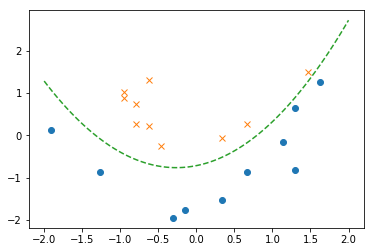

In [3]:
# x軸の値として-2から2までの等差数列を生成
x0 = np.linspace(start=-2, # 数列の始点
                 stop=2,   # 数列の終点
                 num=100   # 等差数列の要素数
                 )

# t == 1のデータをプロット
plt.plot(x_std[t == 1, 0],
         x_std[t == 1, 1], 'o')
# t == 0のデータをプロット
plt.plot(x_std[t == 0, 0],
         x_std[t == 0, 1], 'x')
# 決定境界をプロット
plt.plot(x0,
         -(parameter[0] + parameter[1] * x0
         + parameter[3] * x0 ** 2) / parameter[2],
         linestyle='dashed'
         )
plt.show()